# Time Series Forecast Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700
2018-08-23,21.190001,22.32,21.139999,22.290001,22.290001,113444100
2018-08-24,22.910000,24.00,22.670000,23.980000,23.980000,164328200


In [8]:
close = dataset['Adj Close']

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [5]:
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return np.array(diff)

In [6]:
def predict(coef, dataset):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * dataset[-i]
	return yhat

In [22]:
X = difference(close.values)
size = int(len(X) * 0.20)
train, test = X[0:size], X[size:]
# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
rmse = np.sqrt(mean_squared_error(test, predictions))

In [23]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.342


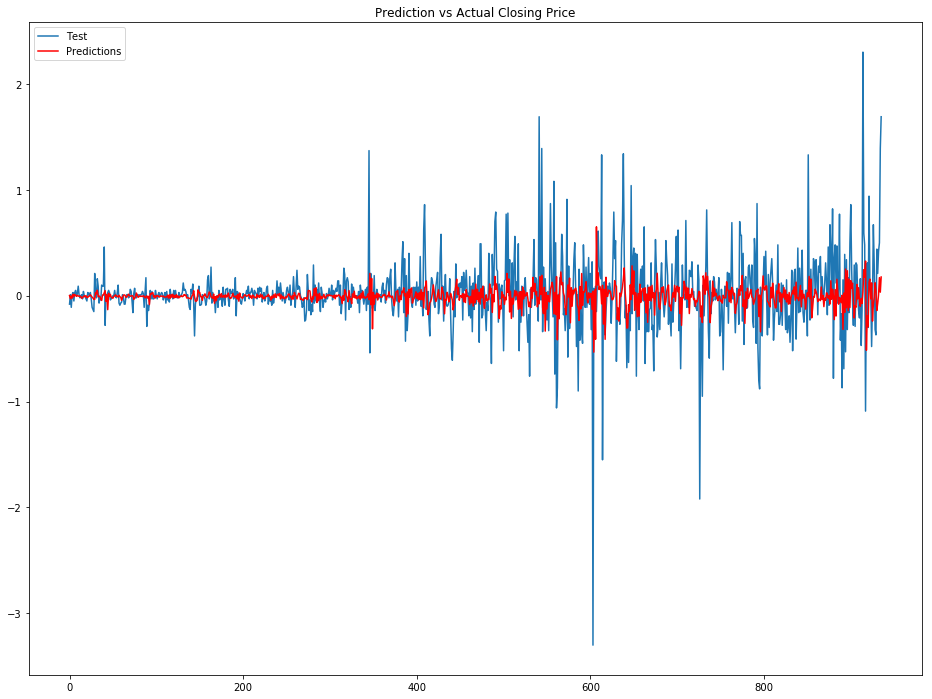

In [24]:
plt.figure(figsize=(16,12))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Prediction vs Actual Closing Price')
plt.legend(['Test', 'Predictions'])
plt.show()